<a href="https://colab.research.google.com/github/biniyam-mulugeta/test_co_2/blob/main/softmax_vg_wiz_mob_conc_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np 
from keras.models import Model
from keras.layers import Flatten,concatenate,Dense,Dropout,Conv2D
from keras.applications import vgg16,densenet, mobilenet_v2,efficientnet#densenetmobilenet_v2#,efficientnet,vgg16,densenet
#from keras_preprocessing import image
#from keras_preprocessing.image import ImageDataGenerator
from keras.utils.all_utils import to_categorical
from sklearn import preprocessing
#from skimage.filters import threshold_otsu
import cv2
from pathlib import Path
import os
import glob
import matplotlib.pyplot as plt
#import seaborn as sns
#import zipfile
%matplotlib inline

In [3]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,label_ranking_loss
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
SIZE = 224
train_image = []
train_label = []
for dir_path in glob.glob("/content/drive/My Drive/coffee/train_cro/*"):
    label = dir_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = otsu_segmentation(img)
        train_image.append(img)
        train_label.append(label)
train_image = np.array(train_image)
train_label = np.array(train_label)

val_image = []
val_label = []
for dir_path_v in glob.glob("/content/drive/My Drive/coffee/validation_cro/*"):
    label_v = dir_path_v.split("\\")[-1]
    #print(label_v)
    for img_path_v in glob.glob(os.path.join(dir_path_v,"*.jpg")):
        #print(img_path_v)
        img = cv2.imread(img_path_v,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = otsu_segmentation(img)
        val_image.append(img)
        val_label.append(label_v)
val_image = np.array(val_image)
val_label = np.array(val_label)

/content/drive/My Drive/coffee/train_cro/rust_cro
/content/drive/My Drive/coffee/train_cro/rust_cro/100.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/100_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/102.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/102_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/103.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/103_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/104.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/107.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/107_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/108.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/109.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/109_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/110.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/110_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/111.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/112.jpg
/content/d

In [5]:
le = preprocessing.LabelEncoder()
le.fit(train_label)
train_labe_encoded = le.transform(train_label)
le.fit(val_label)
val_label_encoded = le.transform(val_label)

In [6]:
x_train,y_train,x_test,y_test = train_image,train_labe_encoded,val_image,val_label_encoded

In [7]:
x_train,x_test = x_train/255.0,x_test/255.0

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
print(x_train.shape,y_train.shape)

(3143, 224, 224, 3) (3143,)


In [ ]:
del(train_image)

In [ ]:
del(train_label)

In [9]:
model_1 = mobilenet_v2.MobileNetV2()
model_2 = vgg16.VGG16()

553476096/553467096 [==============================] - 8s 0us/step


In [ ]:
model_1.summary()

In [ ]:
model_2.summary()

In [10]:
out1 = model_1.get_layer('block_6_project_BN').output
out2 = model_2.get_layer('block5_conv3').output
out = concatenate([out1,out2])
out = Flatten()(out)
out = Dense(5,activation='softmax')(out)

In [11]:
e_model = Model(inputs = ([model_1.input,model_2.input]),outputs = out)
e_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
del(model_1)
del(model_2)

In [12]:
e_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his = e_model.fit([x_train,x_train],y_train_one_hot,epochs=10,validation_data=([x_test,x_test],y_test_one_hot))

Epoch 1/10


In [ ]:
hihs = e_model.evaluate([x_test,x_test],y_test_one_hot )

34/34 [==============================] - 1s 22ms/step - loss: 28.9042 - accuracy: 0.4109


In [ ]:
loss = hihs.history['loss']
acc = hihs.history['accuracy']

AttributeError: ignored

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d.axes3d import Axes3
%matplotlib inline

In [ ]:
x = []
y = []
#x = range(-5,2)
#print(x)

In [ ]:
for i in range(-5,2):
  x.append(i)
  y.append(i**3+5*i**2+10)
print(x,y)

[-5, -4, -3, -2, -1, 0, 1] [10, 26, 28, 22, 14, 10, 16]


NameError: ignored

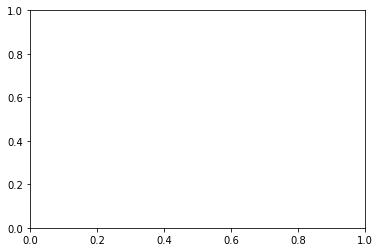

In [ ]:
ax = plt.subplot()
ax.plot(x,y,color = 'red',label = 'y(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

In [ ]:
from matplotlib import markers
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, 'D--r' ms = 20)
plt.show()

SyntaxError: ignored

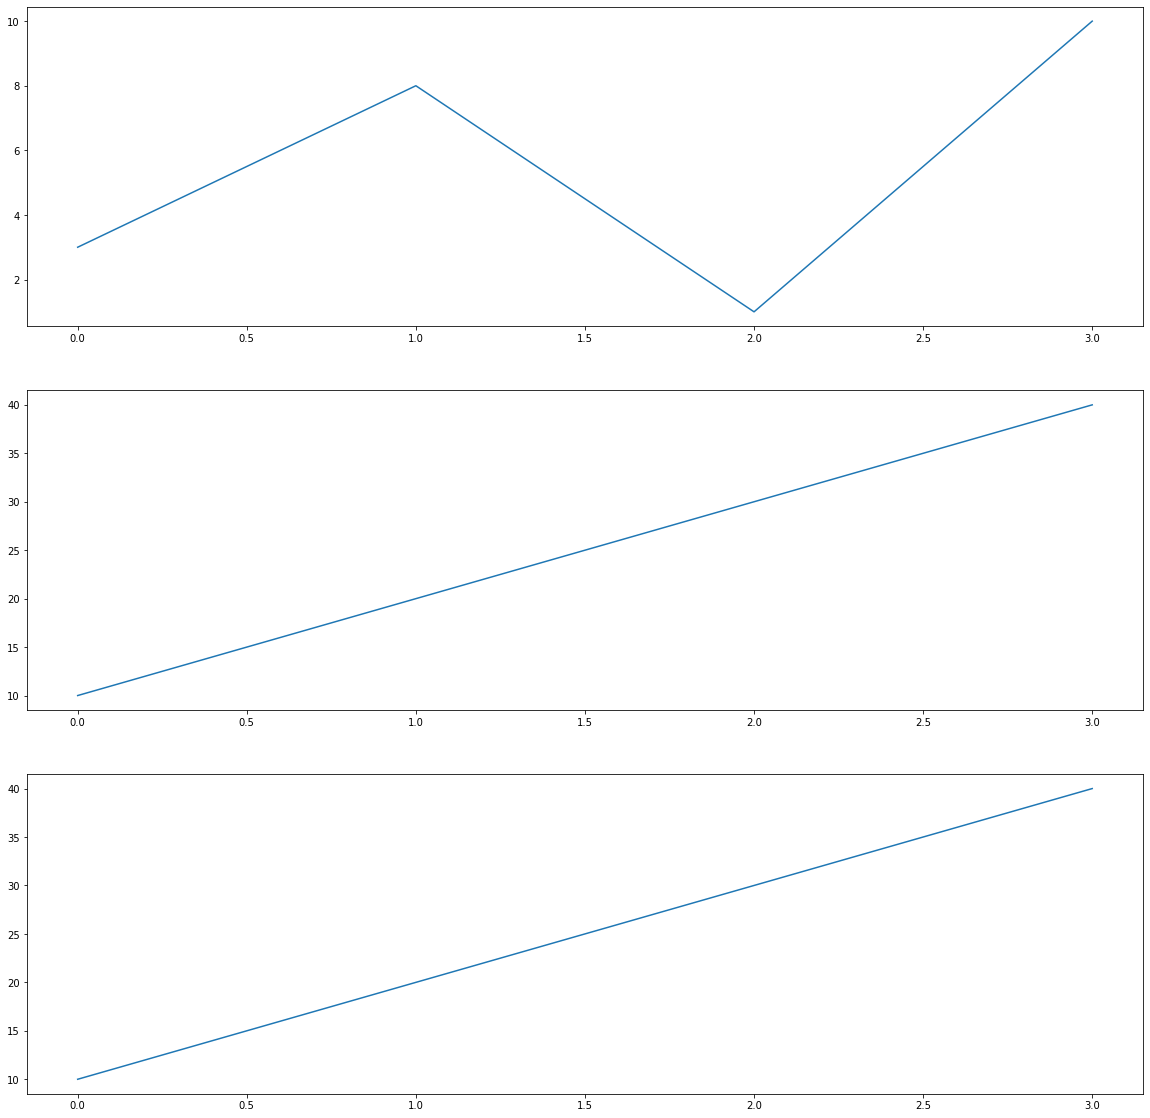

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1)
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(3, 1, 2)
plt.plot(x,y)

x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(3, 1, 3)
plt.plot(x,y)

plt.show()